In [1]:
# 02_full_analytics_pipeline.ipynb

import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [2]:
# Add project directory to path
sys.path.append('..')

# Import project modules
from src.data_processing.preprocessing import load_data, clean_data, feature_engineering
from src.visualization.visualize import plot_time_series, plot_correlation_matrix, create_dashboard
from src.modeling.models import (prepare_features_and_target, train_models, 
                                evaluate_models, plot_model_comparison, 
                                save_best_model, predict_with_model)

In [3]:
# Load raw data
print("Loading raw data...")
raw_data_path = '../data/raw/sample_business_data.csv'
df_raw = load_data(raw_data_path)
print(f"Raw data shape: {df_raw.shape}")
df_raw.head()

Loading raw data...
Raw data shape: (100, 4)


,date,sales,customer_count,marketing_spend
0,2024-01-01,1099.342831,48,1060.075533
1,2024-01-02,972.347140,40,689.318766
2,2024-01-03,1129.537708,65,701.153412
3,2024-01-04,1304.605971,50,1350.627830
4,2024-01-05,953.169325,69,1378.453279


In [4]:

# Clean data
print("\nCleaning data...")
df_clean = clean_data(df_raw)
print(f"Cleaned data shape: {df_clean.shape}")
df_clean.head()


Cleaning data...
Cleaned data shape: (93, 4)


,date,sales,customer_count,marketing_spend
0,2024-01-01,1099.342831,48,1060.075533
1,2024-01-02,972.347140,40,689.318766
2,2024-01-03,1129.537708,65,701.153412
3,2024-01-04,1304.605971,50,1350.627830
5,2024-01-06,953.172609,50,1072.496940


In [5]:
# Feature engineering
print("\nPerforming feature engineering...")
df_processed = feature_engineering(df_clean)
print(f"Processed data shape: {df_processed.shape}")
print("\nNew columns added:")
new_cols = set(df_processed.columns) - set(df_clean.columns)
print(new_cols)
df_processed.head()


Performing feature engineering...
Processed data shape: (93, 10)

New columns added:
{'is_weekend', 'month', 'year', 'marketing_efficiency', 'day_of_week', 'sales_per_customer'}


,date,sales,customer_count,marketing_spend,day_of_week,month,year,is_weekend,marketing_efficiency,sales_per_customer
0,2024-01-01,1099.342831,48,1060.075533,0,1,2024,0,1.037042,22.902976
1,2024-01-02,972.347140,40,689.318766,1,1,2024,0,1.410591,24.308678
2,2024-01-03,1129.537708,65,701.153412,2,1,2024,0,1.610971,17.377503
3,2024-01-04,1304.605971,50,1350.627830,3,1,2024,0,0.965926,26.092119
5,2024-01-06,953.172609,50,1072.496940,5,1,2024,1,0.888742,19.063452


In [6]:
# Save processed data
processed_data_path = '../data/processed/processed_business_data.csv'
df_processed.to_csv(processed_data_path, index=False)
print(f"\nProcessed data saved to {processed_data_path}")



Processed data saved to ../data/processed/processed_business_data.csv



Creating visualizations...


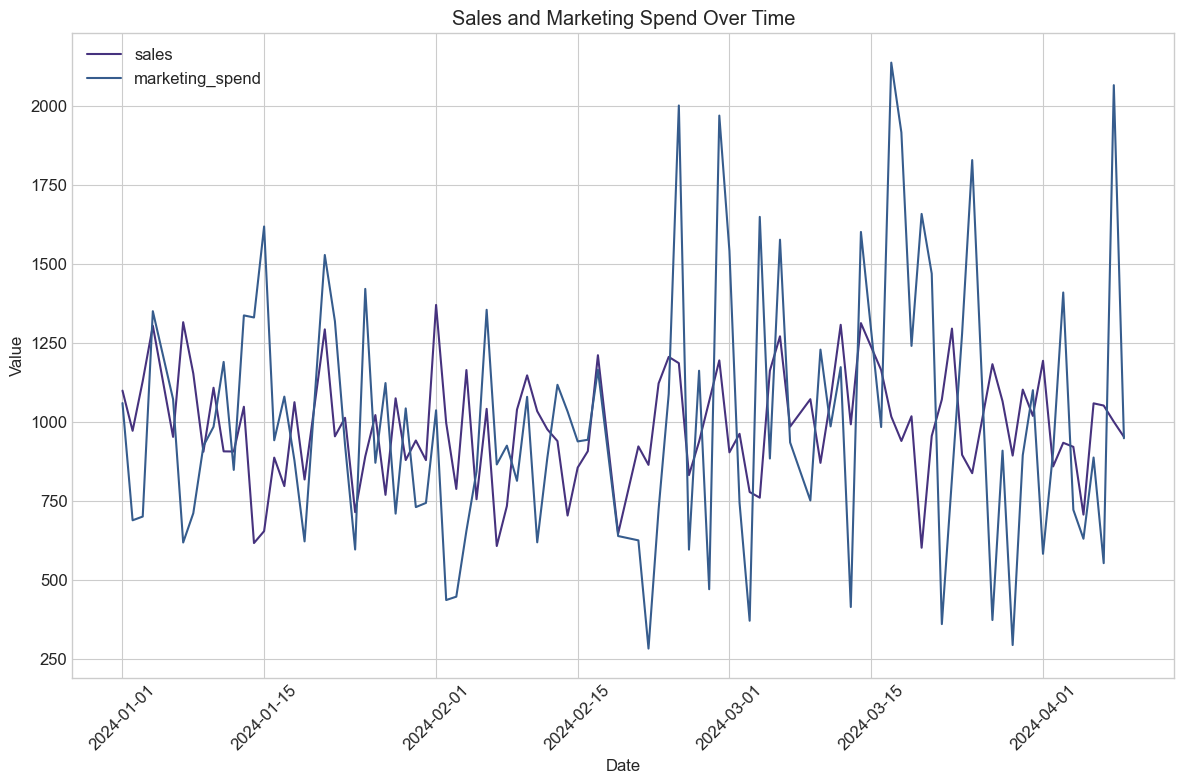

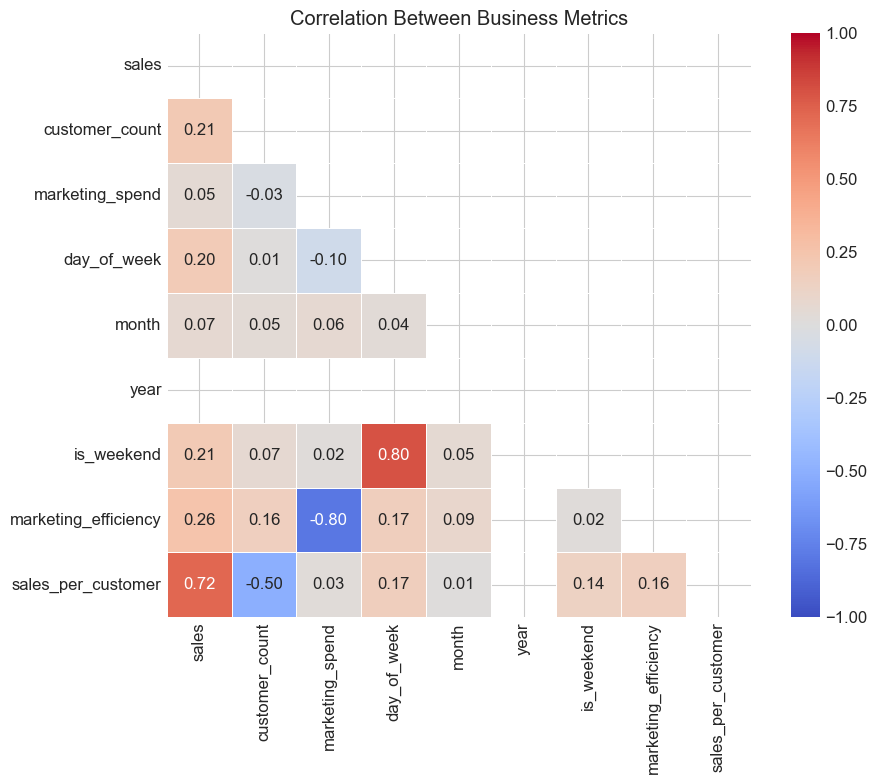

In [7]:
# Visualize data
print("\nCreating visualizations...")

# Time series visualization
plot_time_series(
    df_processed, 
    date_col='date', 
    value_cols=['sales', 'marketing_spend'],
    title='Sales and Marketing Spend Over Time'
)

# Correlation matrix
plot_correlation_matrix(
    df_processed,
    title='Correlation Between Business Metrics'
)


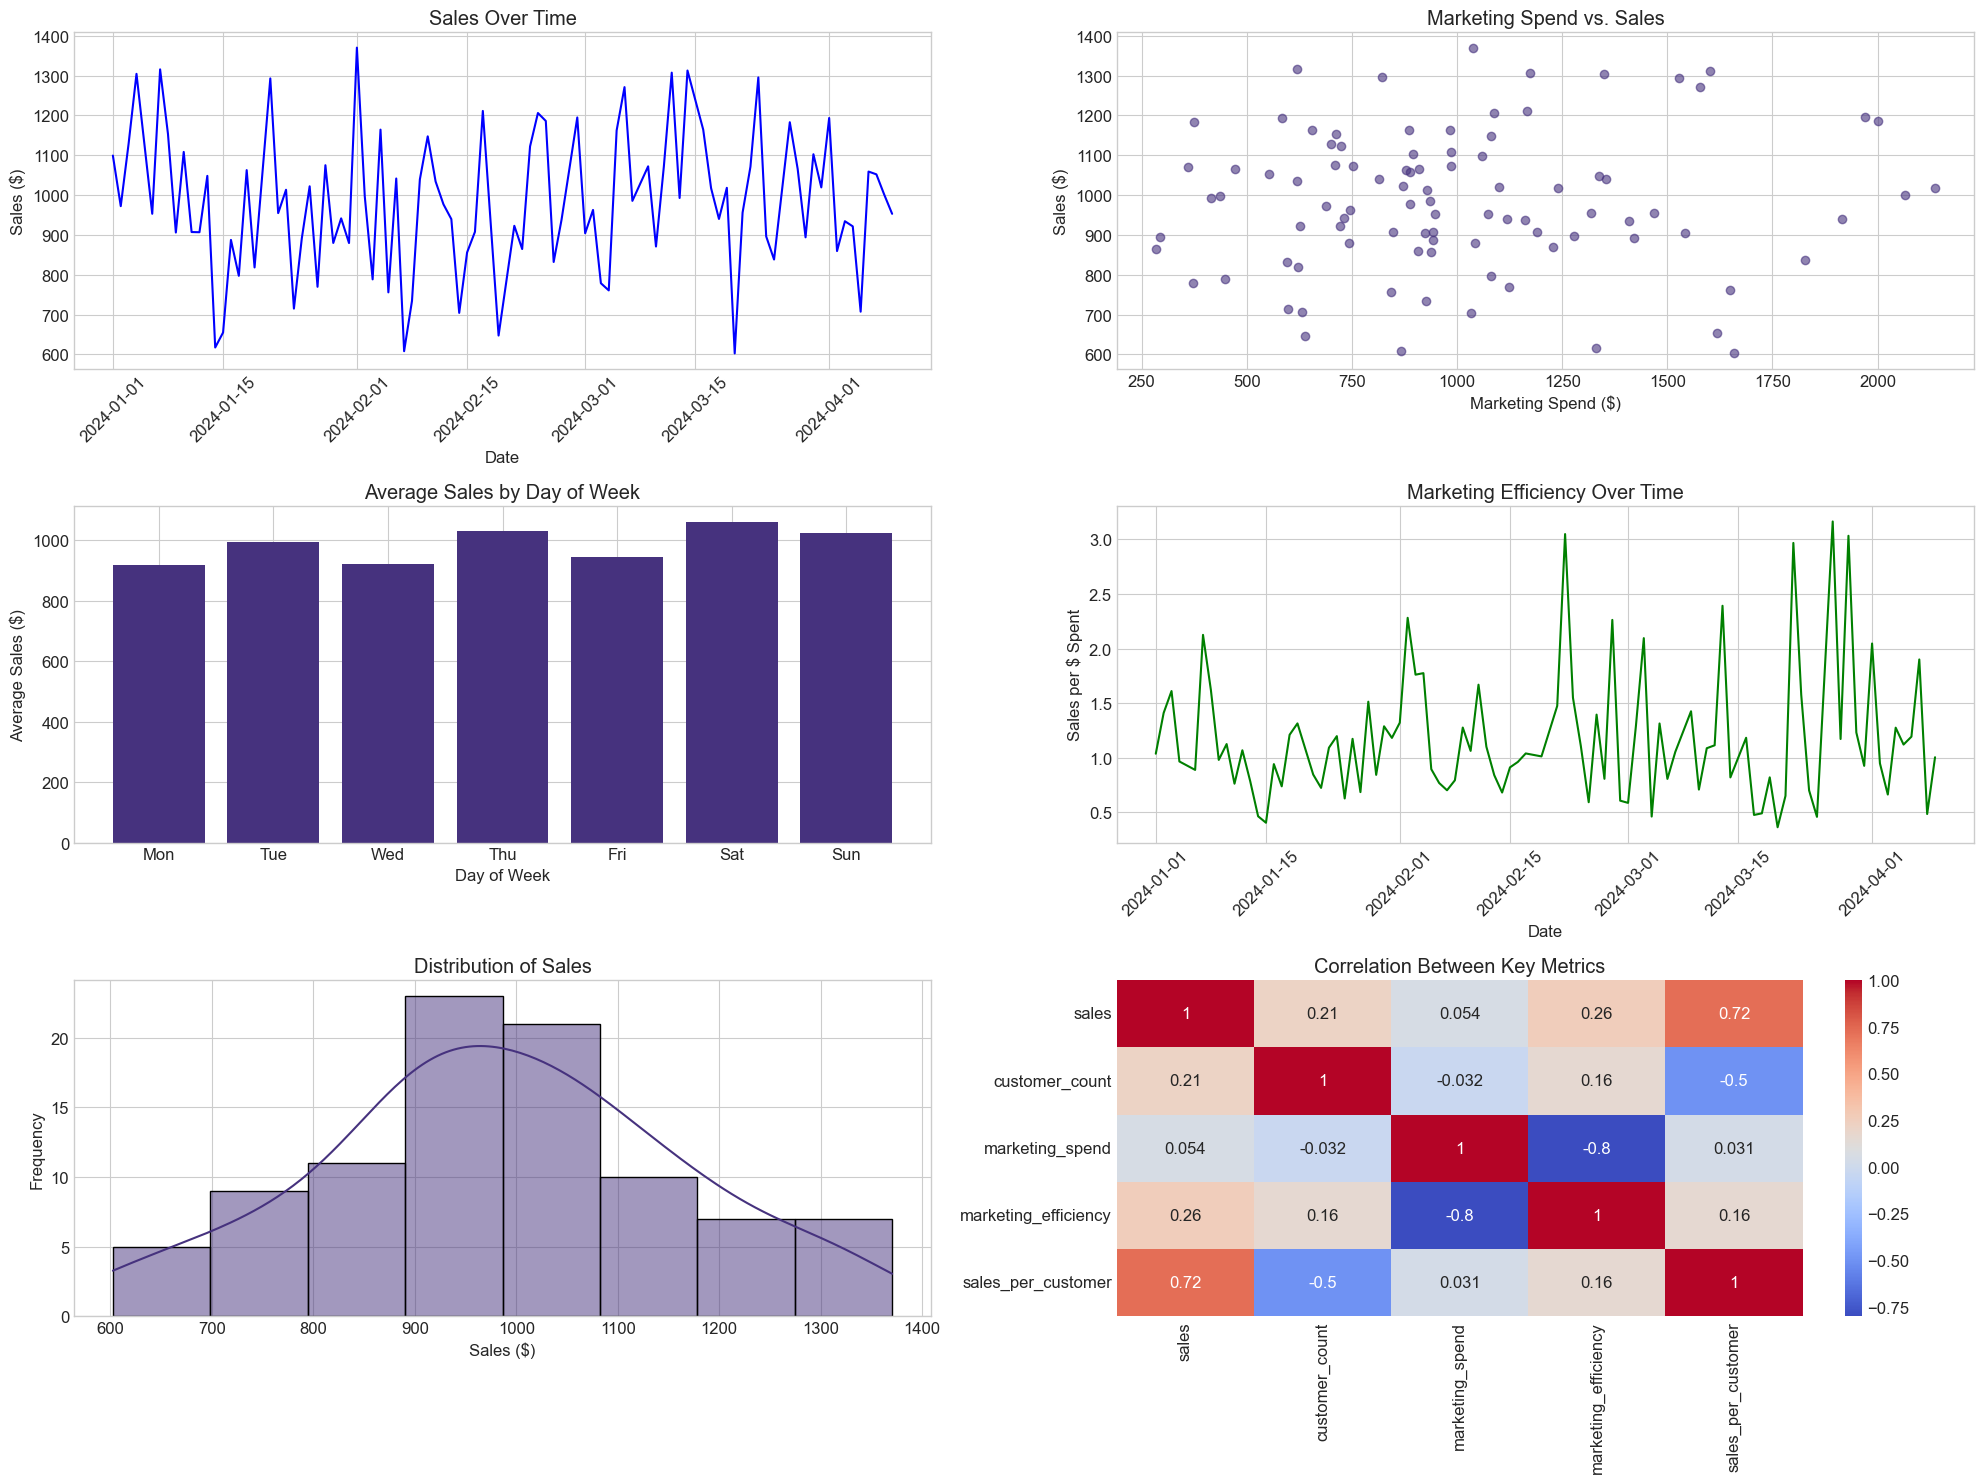

Dashboard saved to '../data/visualizations/business_dashboard.png'


In [8]:
# Create dashboard
create_dashboard(df_processed, save_path='../data/visualizations/business_dashboard.png')
print("Dashboard saved to '../data/visualizations/business_dashboard.png'")



In [9]:
# Machine learning model training
print("\nPreparing for machine learning...")
target_col = 'sales'
X_train, X_test, y_train, y_test, features = prepare_features_and_target(
    df_processed, target_col=target_col
)
print(f"Features used: {features}")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Preparing for machine learning...
Features used: ['customer_count', 'marketing_spend', 'day_of_week', 'month', 'year', 'is_weekend', 'marketing_efficiency', 'sales_per_customer']
Training set shape: (74, 8)
Test set shape: (19, 8)


In [10]:
# Train models
print("\nTraining models...")
models = train_models(X_train, y_train)


Training models...
Trained Linear Regression
Trained Ridge Regression
Trained Lasso Regression
Trained Random Forest
Trained Gradient Boosting


In [11]:
# Evaluate models
eval_df = evaluate_models(models, X_train, X_test, y_train, y_test)
print("\nModel Evaluation:")
display(eval_df)


Model Evaluation:


,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R²,Test R²
0,Linear Regression,26.872717,34.135886,20.389862,19.492228,0.977436,0.955498
1,Ridge Regression,26.879257,34.079406,20.423848,19.494822,0.977425,0.955645
2,Lasso Regression,26.880811,34.179974,20.417119,19.515458,0.977423,0.955383
3,Random Forest,25.604945,52.158272,20.162226,39.836780,0.979515,0.896103
4,Gradient Boosting,4.722779,51.394052,3.530353,44.838594,0.999303,0.899125


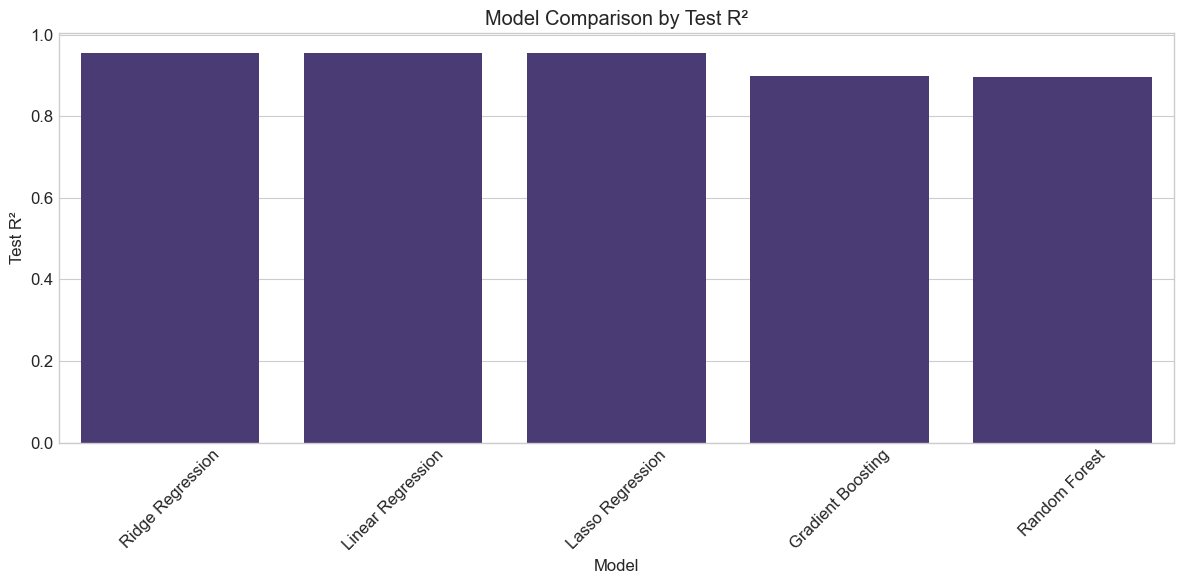

In [12]:
# Plot comparison
plot_model_comparison(eval_df, metric='Test R²')

In [13]:
# Save best model
best_name, best_model = save_best_model(
    models, eval_df, save_path="../models/best_sales_model.pkl"
)
print(f"\nBest model: {best_name}")

Best model (Ridge Regression) saved to ../models/best_sales_model.pkl

Best model: Ridge Regression


In [14]:
# Make predictions on the full dataset
print("\nGenerating predictions on full dataset...")
X_full = df_processed[features]
predictions = predict_with_model(best_model, X_full)


Generating predictions on full dataset...


In [15]:
# Add predictions back to the dataframe
df_processed['predicted_sales'] = predictions

In [16]:
# Calculate prediction errors
df_processed['prediction_error'] = df_processed['sales'] - df_processed['predicted_sales']
df_processed['error_percentage'] = abs(df_processed['prediction_error'] / df_processed['sales'] * 100)

In [17]:
# Show prediction results
print("\nPrediction results summary:")
print(f"Mean Absolute Error: {np.mean(abs(df_processed['prediction_error'])):.2f}")
print(f"Mean Error Percentage: {np.mean(df_processed['error_percentage']):.2f}%")


Prediction results summary:
Mean Absolute Error: 20.23
Mean Error Percentage: 2.13%


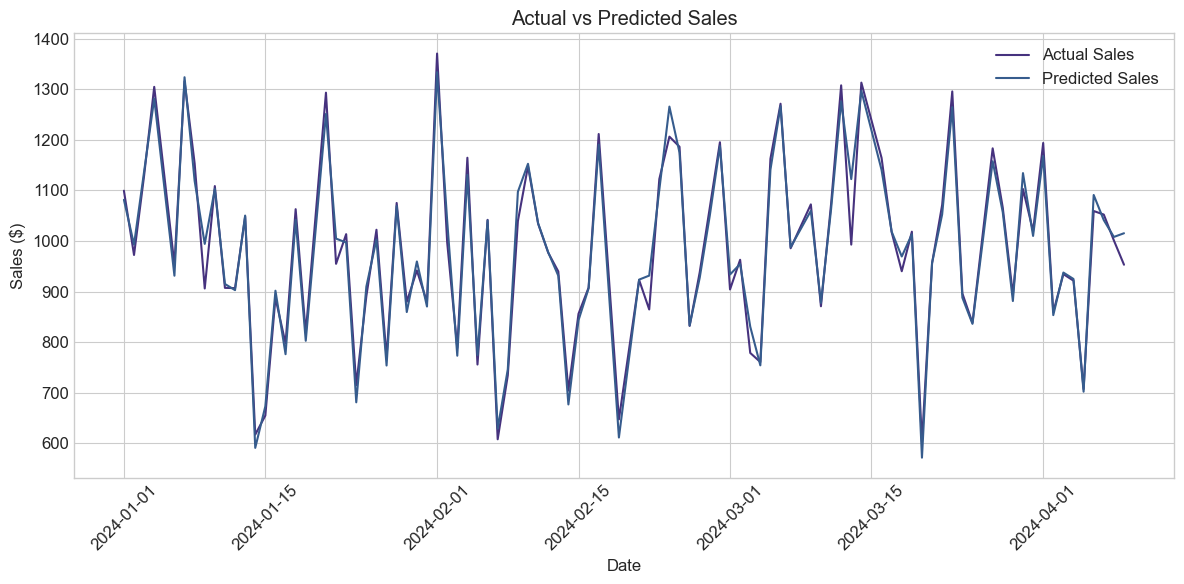

In [18]:
# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(df_processed['date'], df_processed['sales'], label='Actual Sales')
plt.plot(df_processed['date'], df_processed['predicted_sales'], label='Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../data/visualizations/actual_vs_predicted.png')
plt.show()


In [19]:
print("Visualization saved to '../data/visualizations/actual_vs_predicted.png'")

# Save final results
final_results_path = '../data/processed/results_with_predictions.csv'
df_processed.to_csv(final_results_path, index=False)
print(f"\nFinal results saved to {final_results_path}")

print("\nComplete analytics pipeline executed successfully!")

Visualization saved to '../data/visualizations/actual_vs_predicted.png'

Final results saved to ../data/processed/results_with_predictions.csv

Complete analytics pipeline executed successfully!
